# Data Loading and Preparation

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.min())
print(train_images.max())

0
255


In [3]:
# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Display the shape of the loaded data (dimensions visulaizatioin)
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


#Data Exploration

Pixel values of image 0 : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

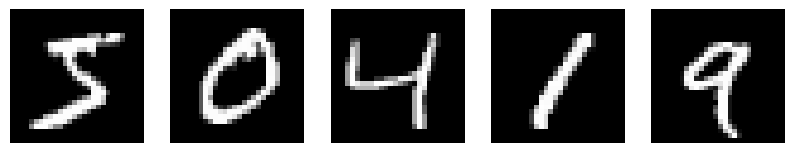

In [5]:

# Print the pixel values of the first few images
for i in range(2):
    print("Pixel values of image", i, ":", train_images[i])

# Visualize the first few images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)       # Create a subplot in the grid
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')      # Remove axis labels and ticks
plt.show()

In [ ]:
#Check the data types of the arrays.
print("Data type of train_images:", train_images.dtype)
print("Data type of train_labels:", train_labels.dtype)

Data type of train_images: float64
Data type of train_labels: uint8


In [ ]:
type(train_labels)

numpy.ndarray

In [10]:
# Describtive statistics

import numpy as np

print("Mean of train_images:", np.mean(train_images))
print("Median of train_images:", np.median(train_images))
print("Min of train_images:", np.min(train_images))
print("Max of train_images:", np.max(train_images))
print("Standard deviation:", np.std(train_images))

Mean of train_images: 33.318421449829934
Median of train_images: 0.0
Min of train_images: 0
Max of train_images: 255
Standard deviation: 78.56748998339798


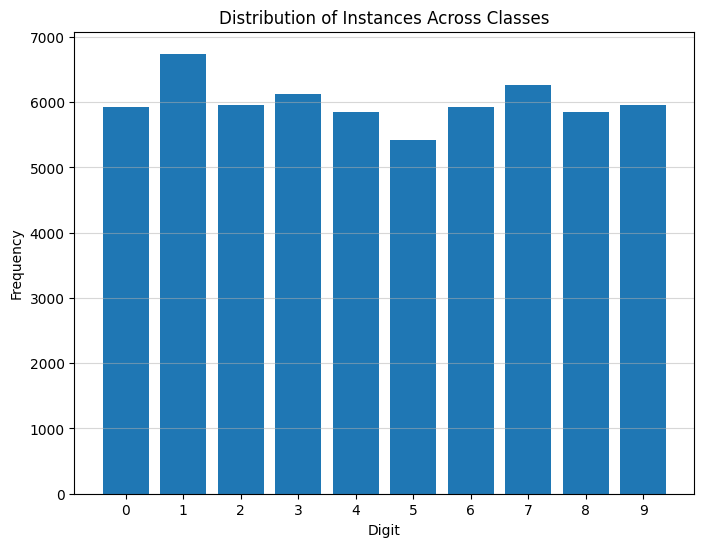

In [6]:
#Distribution of digit classes:

plt.figure(figsize=(8, 6))
plt.hist(train_labels, bins=range(11), rwidth=0.8, align='left')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Instances Across Classes')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [9]:
# Flatten the images for univariate analysis
flat_train_images = train_images.reshape((-1, 28 * 28))

In [10]:
flat_train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

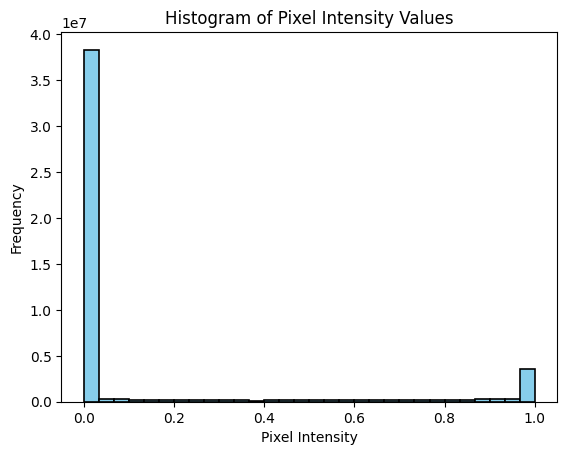

In [8]:
# Histograms
plt.hist(flat_train_images.flatten(), bins=30, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Histogram of Pixel Intensity Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-8e1a952b85fb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flat_train_images.flatten(), shade=True, color='skyblue')


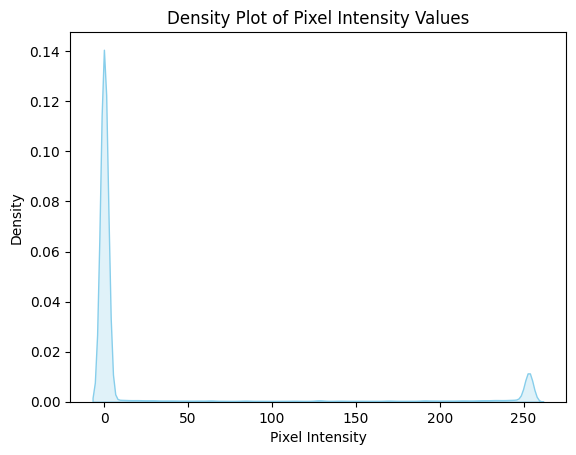

In [11]:
# Density Plot
import seaborn as sns
sns.kdeplot(flat_train_images.flatten(), shade=True, color='skyblue')
plt.title('Density Plot of Pixel Intensity Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.show()

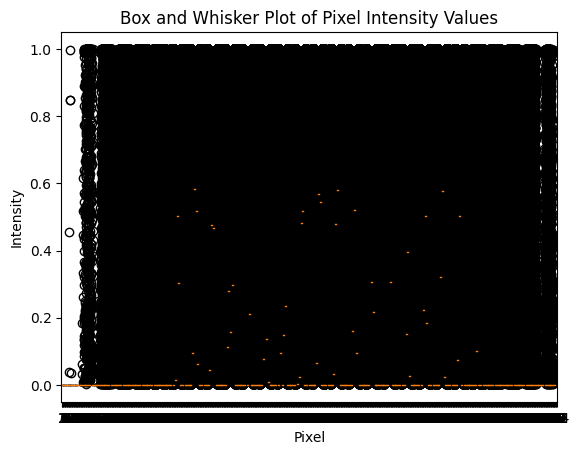

In [ ]:

# Box and Whisker Plot
plt.boxplot(flat_train_images)
plt.title('Box and Whisker Plot of Pixel Intensity Values')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.show()

In [14]:
from scipy.stats import skew

skews = skew(flat_train_images, axis=1)
print("Skewness of pixel intensity values:", skews)


Skewness of pixel intensity values: [2.05784252 1.85418039 2.5668195  ... 2.42220901 2.48759583 2.4701342 ]
